In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# preprocessing

In [6]:
df.drop(columns=['deck', 'embark_town', 'alive', 'alone', 'adult_male', 'class', 'who'], inplace=True)


In [7]:
df.head(1)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.25,S


In [8]:
df['age'].fillna(method = 'ffill', inplace=True)

In [9]:
df = df.dropna(subset=['embarked'])


In [10]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [12]:
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

C:\Users\parthcsssss\AppData\Local\Temp\ipykernel_20692\2440157016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le.fit_transform(df['sex'])
C:\Users\parthcsssss\AppData\Local\Temp\ipykernel_20692\2440157016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = le.fit_transform(df['embarked'])


In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


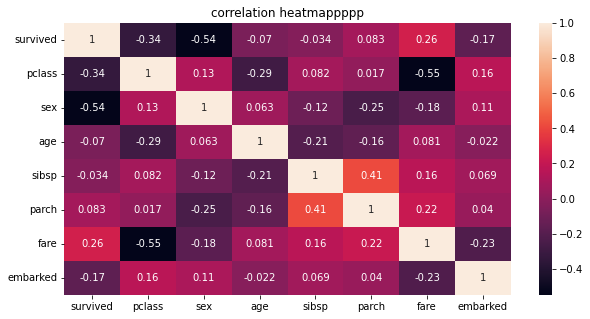

In [14]:
corr_matrix=df.corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix,annot=True)
plt.title("correlation heatmappppp")
plt.show()

In [15]:
x=df.drop(['survived'] , axis= 1)


In [16]:
y=df['survived']

In [17]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


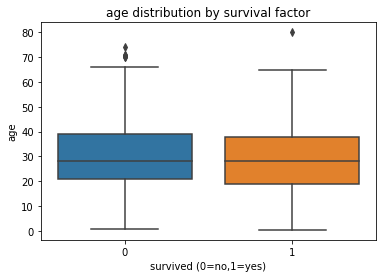

In [18]:
sns.boxplot(data=df,x='survived',y='age')
plt.title("age distribution by survival factor")
plt.xlabel("survived (0=no,1=yes)")
plt.ylabel("age")
plt.show()

C:\Users\parthcsssss\AppData\Local\Temp\ipykernel_20692\1663937520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 30, 50, 80],


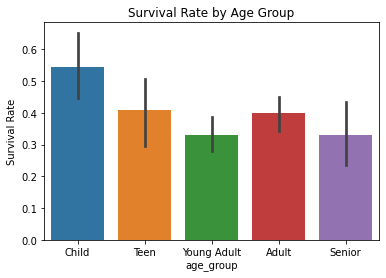

In [19]:
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 30, 50, 80], 
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

sns.barplot(x='age_group', y='survived', data=df)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()




In [22]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked
750,2,0,4.0,1,1,23.0000,2
694,1,1,60.0,0,0,26.5500,2
316,2,0,24.0,1,0,26.0000,2
440,2,0,45.0,1,1,26.2500,2
651,2,0,18.0,0,1,23.0000,2
...,...,...,...,...,...,...,...
474,3,0,22.0,0,0,9.8375,2
855,3,0,18.0,0,1,9.3500,2
595,3,1,36.0,1,1,24.1500,2
693,3,1,25.0,0,0,7.2250,0


In [23]:
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
model.score(x_test,y_test)

0.7902621722846442

In [25]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[135  33]
 [ 23  76]]


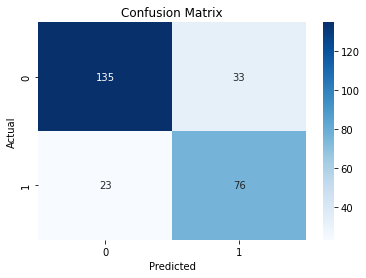

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.80      0.83       168
           1       0.70      0.77      0.73        99

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



# Is our model overfitting or under fitting 

In [29]:
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.789
Test Accuracy: 0.790


<AxesSubplot:xlabel='survived', ylabel='count'>

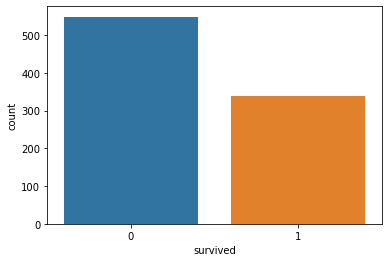

In [30]:
import seaborn as sns
sns.countplot(x='survived', data=df)


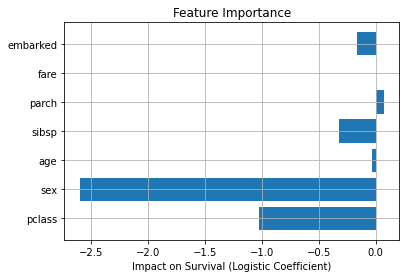

In [31]:
import matplotlib.pyplot as plt
feature_names=x.columns
coefficients = model.coef_[0]
plt.barh(feature_names, coefficients)
plt.xlabel("Impact on Survival (Logistic Coefficient)")
plt.title("Feature Importance")
plt.grid(True)
plt.show()


In [32]:
import joblib


joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   889 non-null    int64   
 1   pclass     889 non-null    int64   
 2   sex        889 non-null    int32   
 3   age        889 non-null    float64 
 4   sibsp      889 non-null    int64   
 5   parch      889 non-null    int64   
 6   fare       889 non-null    float64 
 7   embarked   889 non-null    int32   
 8   age_group  889 non-null    category
dtypes: category(1), float64(2), int32(2), int64(4)
memory usage: 56.6 KB


In [34]:
x.to_csv("titanic_cleaned.csv", index=False)


In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8352059925093633


In [39]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[158  10]
 [ 34  65]]


In [40]:

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       168
           1       0.87      0.66      0.75        99

    accuracy                           0.84       267
   macro avg       0.84      0.80      0.81       267
weighted avg       0.84      0.84      0.83       267



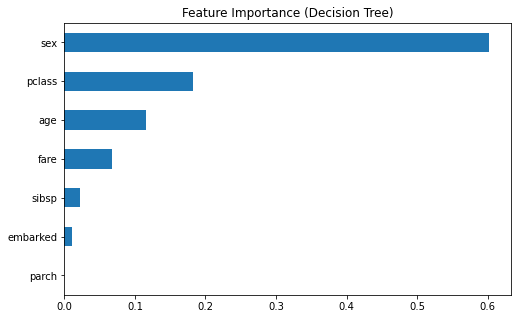

In [42]:
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance (Decision Tree)")
plt.show()
